In [12]:
from docplex.mp.model import Model
import numpy as np

# Constants
N = 10  # Time horizon
setpoint = 24  # Setpoint temperature (in Celsius)
dt = 1  # Time step (in hours)
k_hvac = 0.1  # HVAC heating or cooling rate constant
k_transfer = 0.05  # Heat transfer coefficient between indoor air and ambient

# Create a model
model = Model("RoomTemperatureMPC")

# Decision variables
room_temp = {t: model.continuous_var(name=f"room_temp_{t}", lb=0, ub=100) for t in range(N)}
hvac_heat = {t: model.continuous_var(name=f"hvac_heat_{t}", lb=-10, ub=10) for t in range(N)}

# Initial room temperature
room_temp_init = 20

# Objective: minimize deviation from setpoint
obj = model.sum((room_temp[t] - setpoint) ** 2 for t in range(N))
model.minimize(obj)

# Constraints
for t in range(N-1):
    # Room temperature dynamics
    model.add_constraint(room_temp[t+1] == room_temp[t] + dt * (k_hvac * hvac_heat[t] - k_transfer * (room_temp[t] - 25)))

# Initial condition constraint
model.add_constraint(room_temp[0] == room_temp_init)

# Solve the optimization problem
solver = model.solve()

# Display solution
if solver:
    print("Solution found:")
    # Add arbitrary noise to the indoor temperature
    noise_mean = 0  # Mean of the noise
    noise_std = 0.1  # Standard deviation of the noise
    noise = np.random.normal(noise_mean, noise_std, N)
    
    for t in range(N):
        noisy_room_temp = room_temp[t].solution_value + noise[t]
        print(f"Time {t}: Noisy Room temperature = {noisy_room_temp:.2f}°C, HVAC heat = {hvac_heat[t].solution_value:.2f} kW")
else:
    print("No solution found.")


Solution found:
Time 0: Noisy Room temperature = 19.94°C, HVAC heat = 10.00 kW
Time 1: Noisy Room temperature = 21.21°C, HVAC heat = 10.00 kW
Time 2: Noisy Room temperature = 22.42°C, HVAC heat = 10.00 kW
Time 3: Noisy Room temperature = 23.62°C, HVAC heat = 3.63 kW
Time 4: Noisy Room temperature = 24.13°C, HVAC heat = -0.50 kW
Time 5: Noisy Room temperature = 23.97°C, HVAC heat = -0.50 kW
Time 6: Noisy Room temperature = 24.13°C, HVAC heat = -0.50 kW
Time 7: Noisy Room temperature = 24.12°C, HVAC heat = -0.50 kW
Time 8: Noisy Room temperature = 24.12°C, HVAC heat = -0.50 kW
Time 9: Noisy Room temperature = 23.89°C, HVAC heat = -10.00 kW


Solution found:


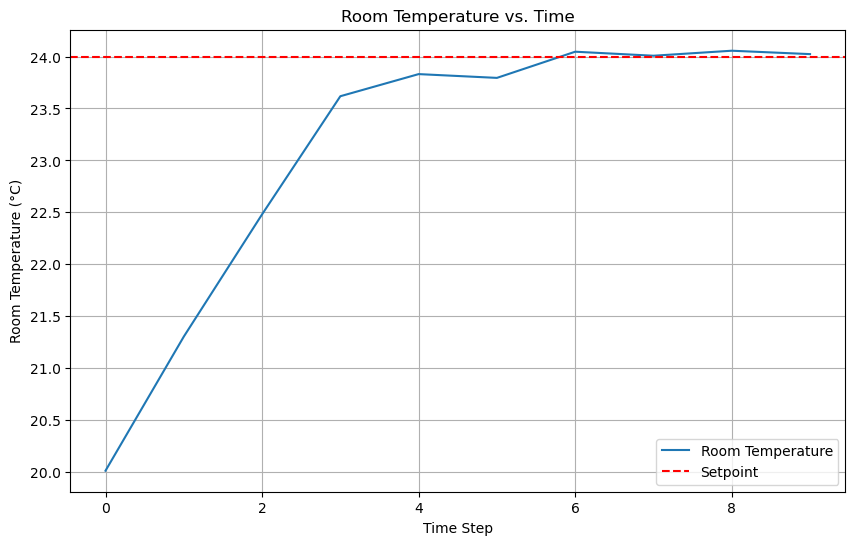

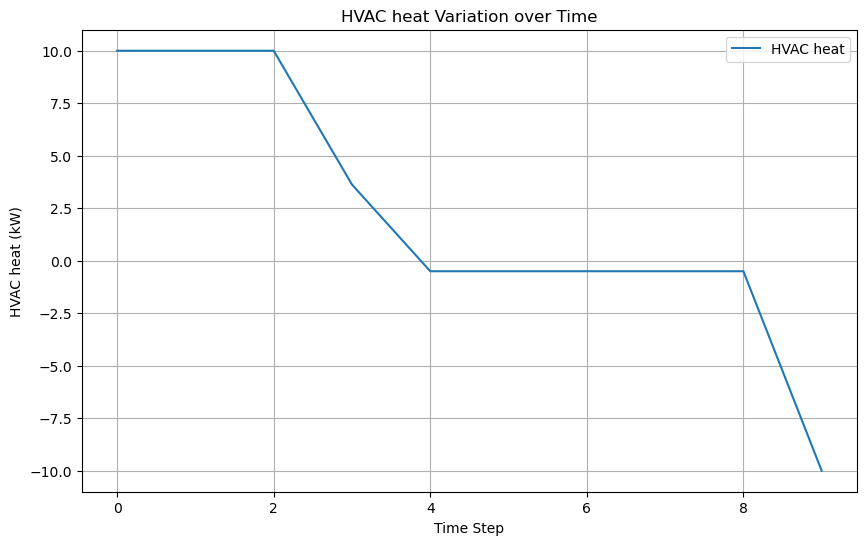

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from docplex.mp.model import Model

# Constants
N = 10  # Time horizon
setpoint = 24  # Setpoint temperature (in Celsius)
dt = 1  # Time step (in hours)
k_hvac = 0.1  # HVAC heating or cooling rate constant
k_transfer = 0.05  # Heat transfer coefficient between indoor air and ambient

# Create a model
model = Model("RoomTemperatureMPC")

# Decision variables
room_temp = {t: model.continuous_var(name=f"room_temp_{t}", lb=0, ub=100) for t in range(N)}
hvac_heat = {t: model.continuous_var(name=f"hvac_heat_{t}", lb=-10, ub=10) for t in range(N)}

# Initial room temperature
room_temp_init = 20

# Objective: minimize deviation from setpoint
obj = model.sum((room_temp[t] - setpoint) ** 2 for t in range(N))
model.minimize(obj)

# Constraints
for t in range(N-1):
    # Room temperature dynamics
    model.add_constraint(room_temp[t+1] == room_temp[t] + dt * (k_hvac * hvac_heat[t] - k_transfer * (room_temp[t] - 25)))

# Initial condition constraint
model.add_constraint(room_temp[0] == room_temp_init)

# Solve the optimization problem
solver = model.solve()

# Display solution and plot
if solver:
    print("Solution found:")
    # Add arbitrary noise to the indoor temperature
    noise_mean = 0  # Mean of the noise
    noise_std = 0.1  # Standard deviation of the noise
    noise = np.random.normal(noise_mean, noise_std, N)
    
    # Extract room temperature and HVAC heat values
    room_temp_values = [room_temp[t].solution_value + noise[t] for t in range(N)]
    hvac_heat_values = [hvac_heat[t].solution_value for t in range(N)]

    # Plot indoor temperature versus time
    plt.figure(figsize=(10, 6))
    plt.plot(range(N), room_temp_values, label='Room Temperature')
    plt.axhline(y=setpoint, color='r', linestyle='--', label='Setpoint')
    plt.xlabel('Time Step')
    plt.ylabel('Room Temperature (°C)')
    plt.title('Room Temperature vs. Time')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot HVAC power variation over time
    plt.figure(figsize=(10, 6))
    plt.plot(range(N), hvac_heat_values, label='HVAC heat')
    plt.xlabel('Time Step')
    plt.ylabel('HVAC heat (kW)')
    plt.title('HVAC heat Variation over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No solution found.")
